# **Intersection Analysis**

This notebook contains the necessary code to identify the genes shared between **Xenium Human Immuno-Oncology**, the differentially expressed genes in the **Tumors FA**, and **Pablos's list proteins**.

In [2]:
# Libraries to import

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2 
from matplotlib_venn import venn3

In [17]:
# Hubsin FA HNSCC
# Read genes from a file
df_fascc = pd.read_csv("filtered_hubs_by_criteria_fa_hnscc.csv")
df_fascc.head()

,Node,DegreeCentrality,BetweennessCentrality,ClosenessCentrality,EigenvectorCentrality,PageRank,DegreeCentrality_High,BetweennessCentrality_High,ClosenessCentrality_High,EigenvectorCentrality_High,PageRank_High,HubScore,IsHub,Community
0,RPL4,0.477612,0.019612,0.610942,0.146122,0.010910,True,True,True,True,True,5,True,0
1,RPS18,0.472637,0.022993,0.603604,0.137165,0.011024,True,True,True,True,True,5,True,0
2,RPL23A,0.467662,0.028651,0.616564,0.141057,0.010896,True,True,True,True,True,5,True,0
3,RPS23,0.462687,0.024731,0.600000,0.134796,0.010793,True,True,True,True,True,5,True,0
4,RPL9,0.457711,0.015669,0.596439,0.139803,0.010541,True,True,True,True,True,5,True,0


In [18]:
# Hubs in FA HNSCC
hubs_fa_hnscc = df_fascc['Node'].tolist()
print(f"Number of hubs in FA HNSCC: {len(hubs_fa_hnscc)}")

Number of hubs in FA HNSCC: 553


In [19]:
# Hubsin HNSCC
# Read genes from a file
df_hnscc = pd.read_csv("filtered_hubs_by_criteria_hscc_tcga.csv")
df_hnscc.head()

,Node,DegreeCentrality,BetweennessCentrality,ClosenessCentrality,EigenvectorCentrality,PageRank,DegreeCentrality_High,BetweennessCentrality_High,ClosenessCentrality_High,EigenvectorCentrality_High,PageRank_High,HubScore,IsHub,Community
0,CD4,0.446097,0.391475,0.587336,0.365614,0.048084,True,True,True,True,True,5,True,0
1,CCR7,0.234201,0.064676,0.471930,0.263560,0.022451,True,True,True,True,True,5,True,0
2,CD27,0.200743,0.059949,0.474427,0.224773,0.020400,True,True,True,True,True,5,True,0
3,GZMB,0.163569,0.026218,0.459044,0.217560,0.015554,True,True,True,True,True,5,True,0
4,TYROBP,0.159851,0.111081,0.419657,0.075251,0.022899,True,True,True,True,True,5,True,0


In [20]:
# Hubs in FA HNSCC
hubs_hnscc = df_hnscc['Node'].tolist()
print(f"Number of hubs in HNSCC: {len(hubs_hnscc)}")

Number of hubs in HNSCC: 570


In [21]:
# Xenium genes
# Read genes from a file
df_xenium = pd.read_csv("Xenium_hIO_v1_metadata.csv")
df_xenium.head()

,Gene,Ensemble ID,Num_Probesets,Codewords,Annotation
0,A2M,ENSG00000175899,2,1,NaN
1,ACE2,ENSG00000130234,8,1,Hormone Processing
2,ACTA2,ENSG00000107796,8,1,Stromal Cell
3,ACTB,ENSG00000075624,2,1,Cytoskeleton
4,ADAM28,ENSG00000042980,4,1,B cell


In [22]:
xenium_genes = df_xenium['Gene'].tolist()
print(f"Number of genes in Xenium hIO v1: {len(xenium_genes)}")

Number of genes in Xenium hIO v1: 380


In [4]:
# Antibody list
genes_ab = [
    "ITGB3", "MMP1", "MMP2", "MMP7", "MMP8", "MMP11", "MMP13", "MMP14",
    "MMP17", "MMP19", "MMP28", "TIMP3", "COL1A1", "FN1"
]

print(len(genes_ab))  # 14 genes

14


In [6]:
# Protein list 
proteins = [
    "TIMP1","COL1A1","FAP1","FN1","VIM","COL4A1","MMP9","PANCK","TNC","ACTA2"
]
print(len(proteins))  # 10 proteins

10


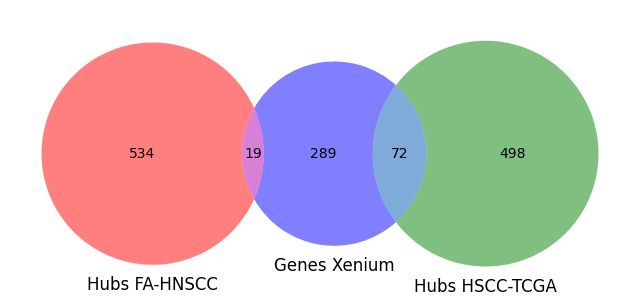

In [27]:
# Make list to contains 
set1 = set(hubs_fa_hnscc)
set2 = set(hubs_hnscc)
set3 = set(xenium_genes)

# PLot Venn diagram
plt.figure(figsize=(8,8))
venn3([set1, set2, set3], set_labels=('Hubs FA-HNSCC', 'Hubs HSCC-TCGA', 'Genes Xenium'), alpha=0.5)

# Show plot
# Save Plot
plt.savefig("venn3_hubs_fa_hnscc_hubs_hnscc_genes_xenium.png", dpi=600)
#plt.title("Intersection of genes between the two methodologies and antibodies")
plt.show()

In [ ]:
# Print intersections
print("Intersection between Hubs FA-HNSCC and Hubs HSCC-TCGA:", set1.intersection(set2))
print("Intersection between Hubs FA-HNSCC and Xenium genes:", set1.intersection(set3))
print("Intersection between Hubs HSCC-TCGA and Xenium genes:", set2.intersection(set3))
print("Intersection between the three sets:", set1.intersection(set2).intersection(set3))

Intersection between Hubs FA-HNSCC and Hubs HSCC-TCGA: set()
Intersection between Hubs FA-HNSCC and Genes Xenium: {'KRAS', 'BRAF', 'IL10', 'FGF2', 'ATM', 'CENPF', 'IL1B', 'IL1A', 'CD274', 'HIF1A', 'NF1', 'ITGA1', 'CDK1', 'MET', 'MKI67', 'PTEN', 'EGFR', 'NT5E', 'PIK3CA'}
Intersection between Hubs HSCC-TCGA and Genes Xenium: {'NOTCH1', 'FOS', 'P2RX1', 'ITGAE', 'CD74', 'CXCR3', 'CXCR4', 'LCK', 'CTLA4', 'CCL2', 'CXCL9', 'FASLG', 'FLT3LG', 'PDCD1', 'FOXP3', 'IL2RB', 'CORO1A', 'TNFRSF17', 'CD40LG', 'SMAD3', 'CD19', 'NKG7', 'CDKN1A', 'CD79A', 'APOE', 'GZMK', 'CCL4', 'CCR5', 'CX3CR1', 'CD86', 'CD8A', 'CCL13', 'CXCR5', 'LAG3', 'TP53', 'CD2', 'CD38', 'PRF1', 'PLA2G7', 'KLRC1', 'CD3D', 'CD40', 'CD3E', 'JUN', 'CD27', 'ACTB', 'CTSD', 'SELL', 'CCR7', 'TGFB1', 'KLRK1', 'IRF8', 'AKT1', 'GZMB', 'IRF1', 'CD68', 'NOTCH3', 'FCGR3A', 'CD4', 'ERBB2', 'GZMH', 'CD247', 'MYD88', 'KLRB1', 'TBX21', 'IL10RA', 'SYK', 'TIGIT', 'PLEK', 'GZMA', 'CXCL10', 'CDKN2C'}
Intersection between the three sets: set()


In [29]:
# Save a file with the intersection genes for each pair and the three sets in one file
# and print a number of genes in each intersection
with open("gene_intersections_HNSCC.txt", "w") as f:
    f.write("Intersection between Hubs FA-HNSCC and Hubs HSCC-TCGA:\n")
    f.write(f"Number of genes in intersection: {len(set1.intersection(set2))}\n")
    f.write(", ".join(set1.intersection(set2)) + "\n\n")
    
    
    f.write("Intersection between Hubs FA-HNSCC and Xenium genes:\n")
    f.write(f"Number of genes in intersection: {len(set1.intersection(set3))}\n")
    f.write(", ".join(set1.intersection(set3)) + "\n\n")
    
    
    f.write("Intersection between HSCC-TCGA and Xenium genes:\n")
    f.write(f"Number of genes in intersection: {len(set2.intersection(set3))}\n")
    f.write(", ".join(set2.intersection(set3)) + "\n\n")
    
    
    f.write("Intersection between the three sets:\n")
    f.write(f"Number of genes in intersection: {len(set1.intersection(set2).intersection(set3))}\n")
    f.write(", ".join(set1.intersection(set2).intersection(set3)) + "\n")
    

print("Intersections saved to gene_intersections_HNSCC.txt")

Intersections saved to gene_intersections_HNSCC.txt


Session Info:

In [30]:
# Información de la sesión
!python --version

Python 3.12.1


In [31]:
!pip list

Package                   Version
------------------------- ---------
adjustText                1.0.4
asttokens                 2.4.1
attrs                     25.3.0
certifi                   2025.4.26
charset-normalizer        3.4.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
docopt                    0.6.2
et_xmlfile                2.0.0
executing                 2.0.1
fastjsonschema            2.21.1
fonttools                 4.47.2
ftpretty                  0.4.0
goatools                  1.4.12
gseapy                    1.1.8
idna                      3.10
ipykernel                 6.29.5
ipython                   8.26.0
jedi                      0.19.1
joblib                    1.4.2
jsonschema                4.23.0
jsonschema-specifications 2025.4.1
jupyter_client            8.6.2
jupyter_core              5.7.2
kiwisolver         


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
